In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#view images


parameter changed: Changed filter size

In [4]:
batch_size = 32
img_height = 32
img_width = 32
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)
model_filter = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), strides=(1,1),padding='valid', activation='relu'), #(7x7) kernal size
  layers.MaxPooling2D((3,3), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'), #same padding -> pad in a way to keep output dim same as input dim
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

model_filter.summary()

model_filter.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_filter = model_filter.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,820 (854.77 KB)

 Trainable params: 218,820 (854.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 18s - 12ms/step - accuracy: 0.1445 - loss: 3.6970 - val_accuracy: 0.2251 - val_loss: 3.2142
Epoch 2/10
1563/1563 - 15s - 9ms/step - accuracy: 0.2671 - loss: 2.9916 - val_accuracy: 0.2884 - val_loss: 2.8789
Epoch 3/10
1563/1563 - 15s - 10ms/step - accuracy: 0.3176 - loss: 2.7155 - val_accuracy: 0.3149 - val_loss: 2.7431
Epoch 4/10
1563/1563 - 14s - 9ms/step - accuracy: 0.3554 - loss: 2.5442 - val_accuracy: 0.3423 - val_loss: 2.6381
Epoch 5/10
1563/1563 - 15s - 10ms/step - accuracy: 0.3837 - loss: 2.4162 - val_accuracy: 0.3526 - val_loss: 2.5857
Epoch 6/10
1563/1563 - 17s - 11ms/step - accuracy: 0.4045 - loss: 2.3089 - val_accuracy: 0.3608 - val_loss: 2.5370
Epoch 7/10
1563/1563 - 15s - 10ms/step - accuracy: 0.4244 - loss: 2.2150 - val_accuracy: 0.3655 - val_loss: 2.5167
Epoch 8/10
1563/1563 - 17s - 11ms/step - accuracy: 0.4392 - loss: 2.1404 - val_accuracy: 0.3729 - val_loss: 2.5134
Epoch 9/10
1563/1563 - 17s - 11ms/step - accuracy: 0.4576 - loss: 2.0713 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3730 - loss: 2.5622
Test Accuracy: 0.37630000710487366


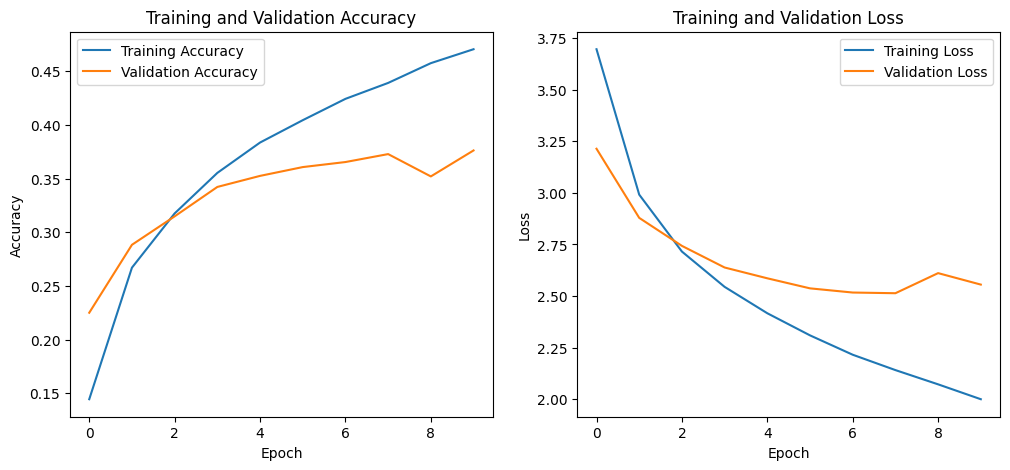

In [5]:

# Evaluate the model
test_loss, test_accuracy = model_filter.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()